# Pricing Options Using Monte Carlo

## Introduction

The Monte Carol simulation is an important algorithm in finance. It is very useful for option pricing and risk managment. We can apply Monte Carlo to pricing options using the model of stock prices from Black Scholes Merton (1973). The stock price in BSM is a stochastic differential equation with geometric Brownian motion under the risk neutral probability. A discretization scheme for the SDE is given by $S_t=S_{t-\Delta t}exp((r-\frac{1}{2}\sigma^2)\Delta t + \sigma \sqrt{\Delta t} W_t)$.

To implement a Monte Carlo valuation for an option, the following algorithm can be applied. 
1. Divide the time interval $[0,T]$ in to equal subintervals of length $\Delta t$.
2. Start iterating $i=1,2,\dots,I$.  
     a. For every time step $t\in{\Delta t, 2\Delta t, \dots, T}$ draw a random number from the normal distribution.   
     b. Determine the time t value of the index level $S_T(i)$ for each time step in the discretization scheme: $S_t=S_{t-\Delta t}exp((r-\frac{1}{2}\sigma^2)\Delta t + \sigma \sqrt{\Delta t} W_t)$.  
     c. At T, determine the value of the option $v_T(S_T(i))$ according to the payoff.  
     d. Iterate until i = I.  
   
3. Average all the values of $v_T(S_T(i))$ and discount them back



Import the needed packages.

In [1]:
from time import time
from math import exp, sqrt, log
from random import gauss, seed
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Part 1: Create the simulation
I create a Monte Carlo simulation using the discretization scheme described above.   

Initalize the variables.

In [2]:
S0 = 100       # current stock price
T = 1.0        # time horizon
r = 0.05       # interest rate
sigma = 0.20   # volatility
N = 50         # number of steps
dt = T/N       # step size
I = 5000       # number of iterations

Set the seed if you wish.

In [3]:
# seed(2000)

Run the simulation

In [4]:
S = []  # initialize an list of stock price paths

for i in range(I):
    path = []  # initialize path
    
    for t in range(N+1):
        if t == 0:
            # add S0 to the end of the 'path' list
            path.append(S0)  
        else:
            # a. Draw a random number from the normal distribution
            wt = gauss(0,1)  
            
            # b. Determine the time t value of the index level
            St_prev = path[-1]
            St = St_prev*exp((r - 0.5*(sigma**2))*dt + sigma*(dt**0.5)*wt)
            
            path.append(St)
    S.append(path)

Graph 10 price paths for the stock price:

Text(0, 0.5, 'index label')

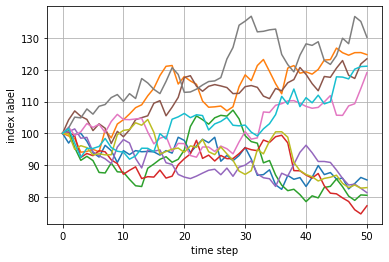

In [5]:
plt.plot(S[0])
plt.plot(S[1])
plt.plot(S[2])
plt.plot(S[3])
plt.plot(S[4])
plt.plot(S[5])
plt.plot(S[6])
plt.plot(S[7])
plt.plot(S[8])
plt.plot(S[9])
plt.grid(True)
plt.xlabel('time step')
plt.ylabel('index label')

## Part 2: Price Options
Using the code from the Monte Carlo and the stock price discretization scheme, I price the following options:  
    a) Call with Strike = 105, Maturity T = 1  
    b) Put with Strike = 105, Maturity T = 1  
    c) Call with Strike (S-K)^2 , Maturity T = 1
    

a) A call with Strike = 105, Maturity T = 1, is priced at $8.22. 2000

In [6]:
K = 105 # initialize strike price
V = []  # initialize list of value paths

for path in S:
    # Determine the time T value of the option according to the payoff
    payoff = path[-1] - K
    V.append(max(0, payoff))

# Average all the values of the options and discount them back
Call = exp(-r*T) * np.sum(V)/I
print(Call)

8.03030619189843


Using call-put parity, we expect the put option to be priced at $8.03.

In [7]:
Call - S0 + K*np.exp(-r*T)

7.909395764473402

b) From our monte carlo simulation, our put is instead priced at $7.88. The discrepency may be attributed to the randomness of the monte carlo.

In [8]:
K = 105 # initialize strike price
V = []  # initialize list of value paths

for path in S: 
    # Determine the time T value of the option according to the payoff
    payoff = K - path[-1]  
    V.append(max(0, payoff))

# Average all the values of the options and discount them back
Put = exp(-r*T) * np.sum(V)/I
print(Put)

7.762894244772823


c) We finally consider a call option of a special payoff (S-K)^2, with Maturity T = 1. We have the price $434.15.

In [9]:
K = 105 # initialize strike price
V = []  # initialize list of value paths

for path in S:
    # Determine the time T value of the option according to the payoff
    payoff = (path[-1] - K)**2
    V.append(payoff)  # a square is always positive so we don't need the max function

# Average all the values of the options and discount them back
Call = exp(-r*T) * np.sum(V)/I
print(Call)

423.6457379630075
